<a href="https://colab.research.google.com/github/MeherNaaz19/FakeNewsDetection-NLP/blob/main/FakeNewsDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FAKE NEWS DETECTION**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Read Datasets

In [ ]:
fake = pd.read_csv("/content/fake.csv")
true = pd.read_csv("/content/true.csv")

In [ ]:
fake.shape

(23481, 4)

In [ ]:
true.shape

(21417, 4)

In [ ]:
#to track fake and true
fake['target'] =0
true['target'] =1


In [ ]:
df=pd.concat([fake,true]).reset_index(drop = True) #concatinating dataframes
df.shape

(44898, 5)

In [ ]:
df.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
df.tail()

,title,text,subject,date,target
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


# Data Pre-Processing

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation
import nltk
import string
from nltk.stem import WordNetLemmatizer # Import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet') # Download the wordnet corpus
nltk.download('punkt_tab') # Download punkt_tab
lemmatizer = WordNetLemmatizer() # Initialize the lemmatizer
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    text=text.lower()
    text=text.translate(str.maketrans('', '', string.punctuation)) # Remove punctuation
    text=re.sub(r'[^a-zA-Z0-9\s]', '', text)
    tokens=word_tokenize(text)#tokenization
    stop_words=set(stopwords.words('english'))#stop words
    tokens=[word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return " ".join(tokens)
df["cleaned_text"]=df["text"].astype(str).apply(preprocess_text)
print(df)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


                                                   title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
44893  'Fully committed' NATO backs new U.S. approach...   
44894  LexisNexis withdrew two products from Chinese ...   
44895  Minsk cultural hub becomes haven from authorities   
44896  Vatican upbeat on possibility of Pope Francis ...   
44897  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text    subject  \
0      Donald Trump just couldn t wish all Americans ...       News   
1      House Intelligence Committee Chairman Devin Nu...       News   
2      On Friday, it was revealed that former Milwauk...       New

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


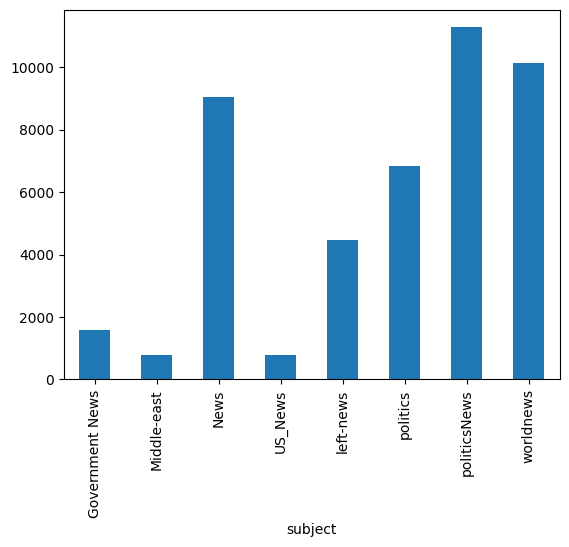

In [ ]:
# No ofarticles per subject
print(df.groupby(['subject'])['text'].count())
df.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
0    23481
1    21417
Name: text, dtype: int64


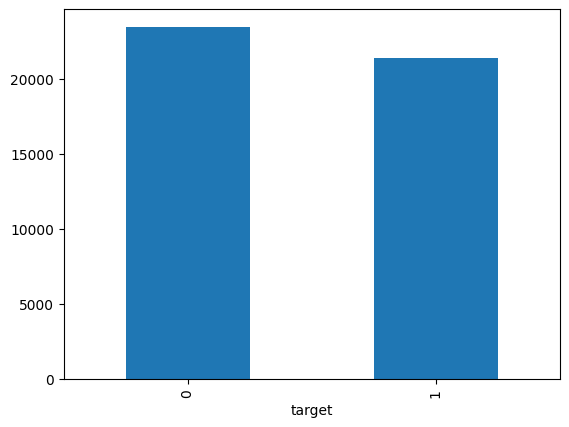

In [ ]:
# no of fake and real articles
print(df.groupby(['target'])['text'].count())
df.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X = df['cleaned_text']
y = df['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Tfidf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=5000)
X_train_tfidf=tfidf.fit_transform(X_train)
X_test_tfidf=tfidf.transform(X_test)

# Deep Learning Models - mlp,cnn,lstm

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Embedding,Conv1D,GlobalMaxPooling1D,LSTM,Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
mlp = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_tfidf.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
mlp.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
mlp.fit(X_train_tfidf.toarray(),y_train,validation_data=(X_test_tfidf.toarray(),y_test),epochs=5,batch_size=64)

Epoch 1/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9281 - loss: 0.2108 - val_accuracy: 0.9910 - val_loss: 0.0314
Epoch 2/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9965 - loss: 0.0134 - val_accuracy: 0.9924 - val_loss: 0.0280
Epoch 3/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9992 - loss: 0.0040 - val_accuracy: 0.9921 - val_loss: 0.0329
Epoch 4/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9997 - loss: 0.0015 - val_accuracy: 0.9932 - val_loss: 0.0318
Epoch 5/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9997 - loss: 0.0013 - val_accuracy: 0.9934 - val_loss: 0.0342


In [ ]:
loss,accuracy = mlp.evaluate(X_test_tfidf.toarray(), y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9928 - loss: 0.0358
Test Loss: 0.0342
Test Accuracy: 0.9934


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer=Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df["cleaned_text"])
X_seq=tokenizer.texts_to_sequences(df["cleaned_text"])
X_pad=pad_sequences(X_seq,maxlen=100)
X_train_seq,X_test_seq,y_train,y_test=train_test_split(X_pad,df["target"],test_size=0.2,random_state=42)
vocab_size=len(tokenizer.word_index)+1
cnn=Sequential([
    Embedding(vocab_size,128,input_length=100),
    Conv1D(128,5,activation="relu"),
    GlobalMaxPooling1D(),
    Dense(64,activation="relu"),
    Dropout(0.3),
    Dense(1,activation="sigmoid")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
cnn.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
cnn.fit(X_train_seq,y_train,validation_data=(X_test_seq,y_test),epochs=5,batch_size=64)

Epoch 1/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.8695 - loss: 0.2785 - val_accuracy: 0.9813 - val_loss: 0.0537
Epoch 2/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9926 - loss: 0.0251 - val_accuracy: 0.9851 - val_loss: 0.0408
Epoch 3/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9995 - loss: 0.0040 - val_accuracy: 0.9861 - val_loss: 0.0459
Epoch 4/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 1.0000 - loss: 5.8880e-04 - val_accuracy: 0.9851 - val_loss: 0.0495
Epoch 5/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 1.0000 - loss: 5.1324e-04 - val_accuracy: 0.9853 - val_loss: 0.0533


In [ ]:
lstm=Sequential([
    Embedding(vocab_size,128,input_length=100),
    Bidirectional(LSTM(64,return_sequences=False)),
    Dropout(0.3),
    Dense(1,activation="sigmoid")
])
lstm.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
lstm.fit(X_train_seq,y_train,validation_data=(X_test_seq,y_test),epochs=5,batch_size=64)

Epoch 1/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.8982 - loss: 0.2258 - val_accuracy: 0.9792 - val_loss: 0.0585
Epoch 2/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - accuracy: 0.9890 - loss: 0.0355 - val_accuracy: 0.9844 - val_loss: 0.0439
Epoch 3/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - accuracy: 0.9965 - loss: 0.0135 - val_accuracy: 0.9773 - val_loss: 0.0866
Epoch 4/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - accuracy: 0.9969 - loss: 0.0102 - val_accuracy: 0.9810 - val_loss: 0.0607
Epoch 5/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - accuracy: 0.9987 - loss: 0.0053 - val_accuracy: 0.9869 - val_loss: 0.0639


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
# Make predictions
mlp_y_pred = (mlp.predict(X_test_tfidf.toarray()) > 0.5).astype("int32")
cnn_y_pred = (cnn.predict(X_test_seq) > 0.5).astype("int32")
lstm_y_pred = (lstm.predict(X_test_seq) > 0.5).astype("int32")
# Generate and print classification reports
print("MLP Model Classification Report:")
print(classification_report(y_test, mlp_y_pred))
print("\nCNN Model Classification Report:")
print(classification_report(y_test, cnn_y_pred))
print("\nBi-LSTM Model Classification Report:")
print(classification_report(y_test, lstm_y_pred))
# Generate and print confusion matrices
print("MLP Model Confusion Matrix:")
print(confusion_matrix(y_test, mlp_y_pred))
print("\nCNN Model Confusion Matrix:")
print(confusion_matrix(y_test, cnn_y_pred))
print("\nBi-LSTM Model Confusion Matrix:")
print(confusion_matrix(y_test, lstm_y_pred))

281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
281/281 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
MLP Model Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4733
           1       0.99      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980


CNN Model Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4733
           1       0.99      0.98      0.98      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980


Bi-LSTM Model Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4733
         

# Machine Learning Models - Logistic Regression , SVM

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf,y_train)
y_pred_lr=lr.predict(X_test_tfidf)
print("Logistic Regression:\n",classification_report(y_test,y_pred_lr))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_lr))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4733
           1       0.99      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

Confusion Matrix:
 [[4670   63]
 [  49 4198]]


In [ ]:
from sklearn.svm import LinearSVC
svm=LinearSVC()
svm.fit(X_train_tfidf,y_train)
y_pred_svm=svm.predict(X_test_tfidf)
print("SVM:\n",classification_report(y_test,y_pred_svm))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_svm))

SVM:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      4733
           1       0.99      1.00      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

Confusion Matrix:
 [[4706   27]
 [  19 4228]]


*   MLP, CNN, Logistic Regression, and SVM: All achieved a high accuracy of 0.99. These models are very good at classifying both fake and real news.
*   Bi-LSTM: Had a slightly lower accuracy of 0.98.
*   SVM: Performed slightly better than the others, showing a small advantage in accurately classifying both fake and real news.
*   In short, all models are quite good, but SVM is the top performer in this case.




281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


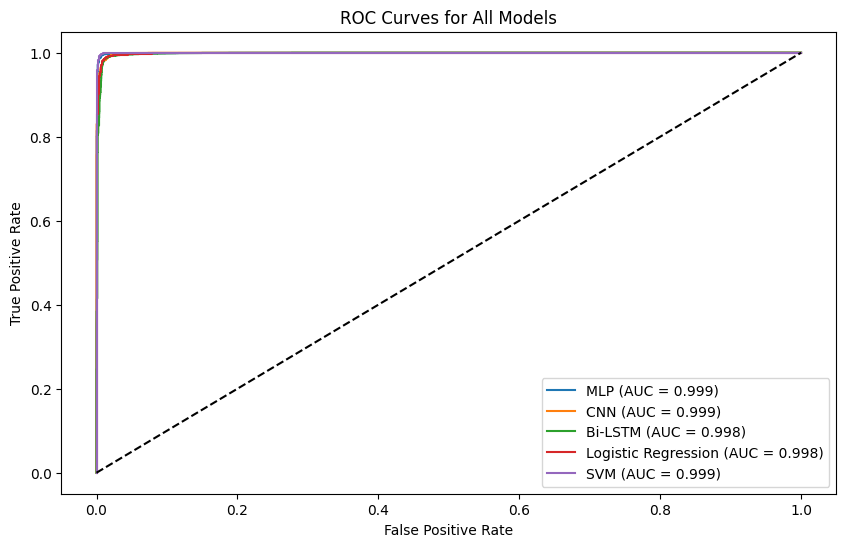

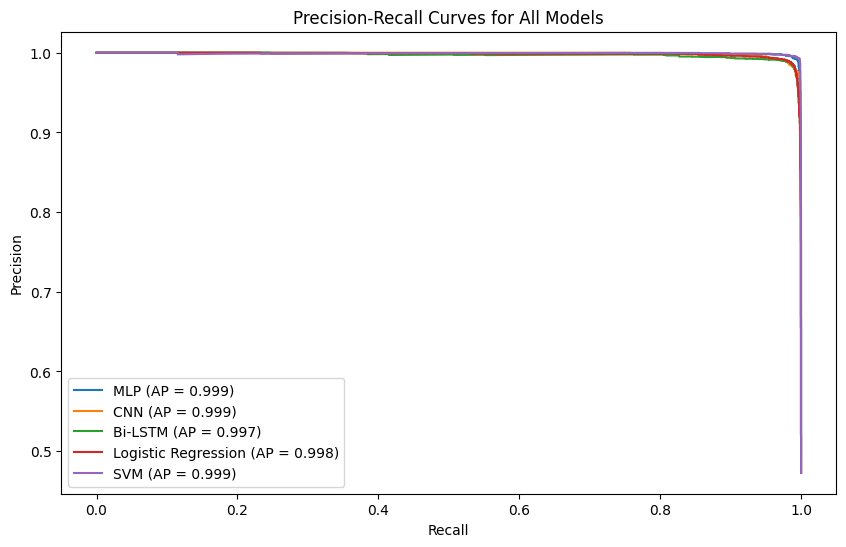


Model Performance Summary:

                      roc_auc  avg_precision  accuracy  precision    recall  \
MLP                  0.999237       0.999103  0.993430   0.992243  0.993878   
CNN                  0.999099       0.998973  0.985301   0.985145  0.983753   
Bi-LSTM              0.997824       0.997044  0.986860   0.986796  0.985401   
Logistic Regression  0.998373       0.998041  0.987528   0.985215  0.988462   
SVM                  0.999479       0.999157  0.994878   0.993655  0.995526   

                           f1  
MLP                  0.993060  
CNN                  0.984449  
Bi-LSTM              0.986098  
Logistic Regression  0.986836  
SVM                  0.994590  


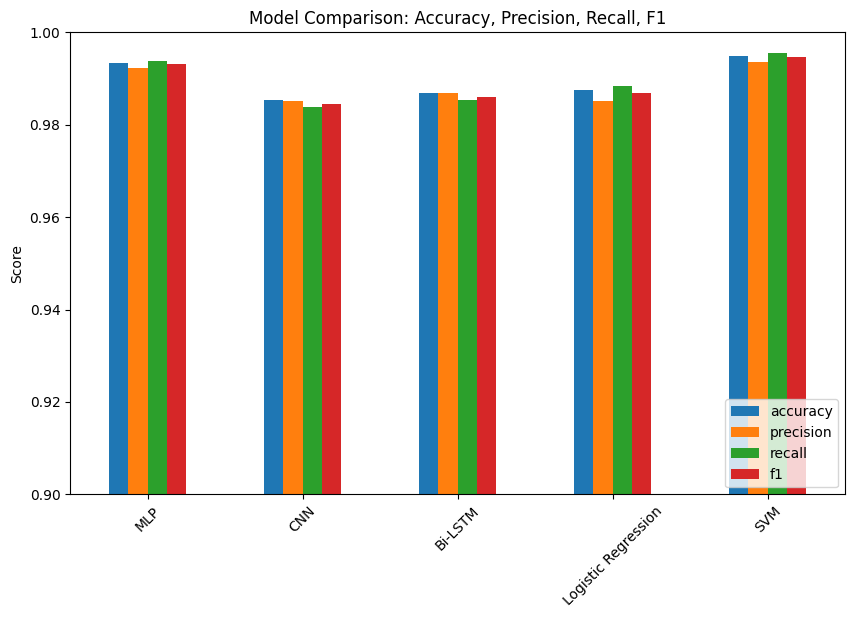

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Dictionary to store model results
results = {}

# Get prediction probabilities for models that support it
y_pred_prob_mlp = mlp.predict(X_test_tfidf.toarray()).ravel()
y_pred_prob_cnn = cnn.predict(X_test_seq).ravel()
y_pred_prob_lstm = lstm.predict(X_test_seq).ravel()
y_pred_prob_lr = lr.predict_proba(X_test_tfidf)[:,1]
# For SVM, need decision_function since no predict_proba
y_pred_prob_svm = svm.decision_function(X_test_tfidf)

# Store model names and predictions
model_preds = {
    "MLP": (y_pred_prob_mlp, mlp_y_pred),
    "CNN": (y_pred_prob_cnn, cnn_y_pred),
    "Bi-LSTM": (y_pred_prob_lstm, lstm_y_pred),
    "Logistic Regression": (y_pred_prob_lr, y_pred_lr),
    "SVM": (y_pred_prob_svm, y_pred_svm)
}

# Plot ROC Curves
plt.figure(figsize=(10, 6))
for name, (y_prob, _) in model_preds.items():
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    results[name] = {"roc_auc": roc_auc}
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall Curves
plt.figure(figsize=(10, 6))
for name, (y_prob, _) in model_preds.items():
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    ap = average_precision_score(y_test, y_prob)
    results[name]["avg_precision"] = ap
    plt.plot(recall, precision, label=f'{name} (AP = {ap:.3f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for All Models')
plt.legend(loc='lower left')
plt.show()

# Calculate metrics for comparison
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

for name, (_, y_pred) in model_preds.items():
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name].update({"accuracy": acc, "precision": prec, "recall": rec, "f1": f1})

# Convert results to DataFrame
import pandas as pd
results_df = pd.DataFrame(results).T
print("\nModel Performance Summary:\n")
print(results_df)

# Plot bar chart comparison
results_df[['accuracy', 'precision', 'recall', 'f1']].plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison: Accuracy, Precision, Recall, F1')
plt.ylabel('Score')
plt.ylim(0.9, 1.0)
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()


In [ ]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 24.4 MB/s eta 0:00:00


In [ ]:
#WORD2VECT-LSTM
import gensim
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from sklearn.metrics import classification_report, confusion_matrix

# Tokenize (reuse cleaned_text)
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df["cleaned_text"])
X_seq = tokenizer.texts_to_sequences(df["cleaned_text"])
X_pad = pad_sequences(X_seq, maxlen=100)
X_train_seq, X_test_seq, y_train, y_test = train_test_split(X_pad, df["target"], test_size=0.2, random_state=42)

# Train Word2Vec model
sentences = [text.split() for text in df["cleaned_text"]]
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)
vocab_size = len(tokenizer.word_index) + 1

# Build embedding matrix from Word2Vec
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]

# Word2Vec + LSTM model
w2v_lstm = Sequential([
    Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=100, trainable=False),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

w2v_lstm.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
w2v_lstm.fit(X_train_seq, y_train, validation_data=(X_test_seq, y_test), epochs=5, batch_size=64)

# Evaluate
loss, accuracy = w2v_lstm.evaluate(X_test_seq, y_test)
print(f"Word2Vec + LSTM Test Accuracy: {accuracy:.4f}")

# Predictions
w2v_y_pred = (w2v_lstm.predict(X_test_seq) > 0.5).astype("int32")
print("Word2Vec + LSTM Classification Report:")
print(classification_report(y_test, w2v_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, w2v_y_pred))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 23s 34ms/step - accuracy: 0.9049 - loss: 0.2185 - val_accuracy: 0.9714 - val_loss: 0.0790
Epoch 2/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.9738 - loss: 0.0726 - val_accuracy: 0.9759 - val_loss: 0.0714
Epoch 3/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9837 - loss: 0.0479 - val_accuracy: 0.9802 - val_loss: 0.0554
Epoch 4/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9825 - loss: 0.0510 - val_accuracy: 0.9818 - val_loss: 0.0555
Epoch 5/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9901 - loss: 0.0318 - val_accuracy: 0.9832 - val_loss: 0.0505
281/281 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9829 - loss: 0.0514
Word2Vec + LSTM Test Accuracy: 0.9832
281/281 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Word2Vec + LSTM Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4733
           1       0.98      0.98      0.98      4247

 

In [ ]:
from sklearn.model_selection import train_test_split
import torch
from transformers import BertTokenizer, BertModel
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

bert_name = 'bert-base-uncased'
bert_tokenizer = BertTokenizer.from_pretrained(bert_name)
bert_model = BertModel.from_pretrained(bert_name).to(device)

texts = df["cleaned_text"].tolist()
labels = df["target"].values
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in sss.split(texts, labels):
    train_texts = [texts[i] for i in train_idx]
    test_texts = [texts[i] for i in test_idx]
    y_train_b = labels[train_idx]
    y_test_b = labels[test_idx]

max_len = 50

def bert_embed(texts):
    embeddings = []
    for txt in tqdm(texts):
        inputs = bert_tokenizer(txt, return_tensors="pt", max_length=max_len,
                                padding='max_length', truncation=True).to(device)
        with torch.no_grad():
            outputs = bert_model(**inputs)
        emb = outputs.last_hidden_state.mean(dim=1).squeeze().cpu().numpy()
        embeddings.append(emb)
    return np.array(embeddings)

X_train_b = bert_embed(train_texts)
X_test_b = bert_embed(test_texts)

X_train_b = X_train_b.reshape((X_train_b.shape[0], 1, X_train_b.shape[1]))
X_test_b = X_test_b.reshape((X_test_b.shape[0], 1, X_test_b.shape[1]))

bert_lstm = Sequential([
    Bidirectional(LSTM(64, return_sequences=False), input_shape=(1, X_train_b.shape[2])),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])
bert_lstm.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
bert_lstm.fit(X_train_b, y_train_b, validation_data=(X_test_b, y_test_b), epochs=5, batch_size=32)

loss, accuracy = bert_lstm.evaluate(X_test_b, y_test_b)
print(f"BERT + LSTM Test Accuracy: {accuracy:.4f}")

bert_y_pred = (bert_lstm.predict(X_test_b) > 0.5).astype("int32")
print("BERT + LSTM Classification Report:")
print(classification_report(y_test_b, bert_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test_b, bert_y_pred))


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

100%|██████████| 8980/8980 [02:06<00:00, 70.98it/s]
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9336 - loss: 0.1711 - val_accuracy: 0.9751 - val_loss: 0.0668
Epoch 2/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9748 - loss: 0.0710 - val_accuracy: 0.9791 - val_loss: 0.0548
Epoch 3/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9784 - loss: 0.0582 - val_accuracy: 0.9648 - val_loss: 0.0925
Epoch 4/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9793 - loss: 0.0563 - val_accuracy: 0.9829 - val_loss: 0.0471
Epoch 5/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9832 - loss: 0.0452 - val_accuracy: 0.9851 - val_loss: 0.0396
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9876 - loss: 0.0353
BERT + LSTM Test Accuracy: 0.9851
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
BERT + LSTM Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4696
           1       0.99      0.98      0.98      4284

    

281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

 Final Model Performance Summary:

                      roc_auc  avg_precision  accuracy  precision    recall  \
MLP                  0.999237       0.999103  0.993430   0.992243  0.993878   
CNN                  0.999099       0.998973  0.985301   0.985145  0.983753   
Bi-LSTM              0.997824       0.997044  0.986860   0.986796  0.985401   
Logistic Regression  0.998373       0.998041  0.987528   0.985215  0.988462   
SVM                  0.999479       0.999157  0.994878   0.993655  0.995526   
Word2Vec + LSTM      0.000000       0.000000  0.983185   0.981656  0.982811   
BERT + LSTM          0.000000       0.000000  0.985078   0.985721  0.982960   

                           f1  
MLP                  0.993060  
CNN                  0.984449  
Bi-LSTM              0.986098  
Logistic Regression  0.986836  
SVM                  0.994590  
Word2Vec + LSTM      0.982233  
BERT + LSTM          0.98

<Figure size 1200x600 with 0 Axes>

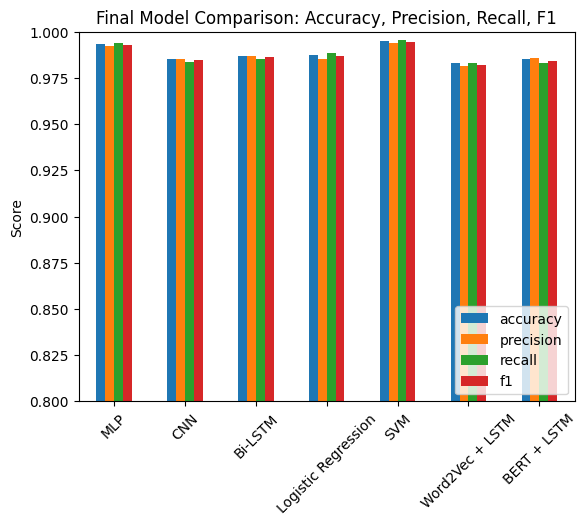

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

model_preds.update({
    "Word2Vec + LSTM": (w2v_lstm.predict(X_test_seq).ravel(), w2v_y_pred),
    "BERT + LSTM": (bert_lstm.predict(X_test_b).ravel(), bert_y_pred)
})

for name, (_, y_pred) in model_preds.items():
    y_true = y_test if "BERT" not in name else y_test_b
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    if name not in results:
        results[name] = {}
    results[name].update({"accuracy": acc, "precision": prec, "recall": rec, "f1": f1})

results_df = pd.DataFrame(results).T.fillna(0)
print("\n Final Model Performance Summary:\n")
print(results_df)
# Plot comparison
plt.figure(figsize=(12,6))
results_df[['accuracy','precision','recall','f1']].plot(kind='bar')
plt.title("Final Model Comparison: Accuracy, Precision, Recall, F1")
plt.ylabel("Score")
plt.ylim(0.8, 1.0)
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Universal Sentence Encoder + LSTM
import tensorflow_hub as hub
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score
# Prepare text and labels
X = df['cleaned_text']
y = df['target'] # Changed 'label' to 'target'
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
#Load Universal Sentence Encoder
print("Loading Universal Sentence Encoder...")
use_embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
#Convert text → embeddings
print("Generating USE embeddings... (may take a few mins)")
X_train_use = np.array([use_embed([x]).numpy().flatten() for x in X_train_text])
X_test_use = np.array([use_embed([x]).numpy().flatten() for x in X_test_text])
#Reshape for LSTM (samples, timesteps, features)
X_train_use = X_train_use.reshape((X_train_use.shape[0], 1, X_train_use.shape[1]))
X_test_use = X_test_use.reshape((X_test_use.shape[0], 1, X_test_use.shape[1]))
# Build LSTM model
model_use_lstm = Sequential([
    LSTM(128, return_sequences=False, input_shape=(1, X_train_use.shape[2])),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
model_use_lstm.compile(optimizer=Adam(learning_rate=1e-3),
                       loss='binary_crossentropy',
                       metrics=['accuracy'])

# Train the model
history_use = model_use_lstm.fit(
    X_train_use, y_train,
    epochs=3,
    batch_size=32,
    validation_data=(X_test_use, y_test),
    verbose=1
)
# Evaluate
y_pred_probs_use = model_use_lstm.predict(X_test_use)
y_pred_use = (y_pred_probs_use > 0.5).astype(int)
print("\nClassification Report (USE + LSTM):")
print(classification_report(y_test, y_pred_use))
roc_auc_use = roc_auc_score(y_test, y_pred_probs_use)
avg_prec_use = average_precision_score(y_test, y_pred_probs_use)
print(f"ROC-AUC: {roc_auc_use:.4f}")
print(f"Average Precision: {avg_prec_use:.4f}")

Loading Universal Sentence Encoder...
Generating USE embeddings... (may take a few mins)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8440 - loss: 0.3599 - val_accuracy: 0.9068 - val_loss: 0.2270
Epoch 2/3
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9021 - loss: 0.2329 - val_accuracy: 0.9133 - val_loss: 0.2189
Epoch 3/3
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9075 - loss: 0.2220 - val_accuracy: 0.9116 - val_loss: 0.2151
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Classification Report (USE + LSTM):
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      4696
           1       0.93      0.88      0.90      4284

    accuracy                           0.91      8980
   macro avg       0.91      0.91      0.91      8980
weighted avg       0.91      0.91      0.91      8980

ROC-AUC: 0.9737
Average Precision: 0.9719


In [ ]:
# GloVe + LSTM

import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score
from sklearn.model_selection import train_test_split

# Prepare data
X = df['cleaned_text']
y = df['target'] # Corrected 'label' to 'target'

X_train_text, X_test_text, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#  Tokenization
max_words = 10000
max_len = 200

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_text)

X_train_seq = tokenizer.texts_to_sequences(X_train_text)
X_test_seq = tokenizer.texts_to_sequences(X_test_text)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Load GloVe embeddings
import os
glove_dir = "glove"
if not os.path.exists(glove_dir):
    os.makedirs(glove_dir)

glove_path = os.path.join(glove_dir, "glove.6B.100d.txt")
if not os.path.exists(glove_path):
    !wget http://nlp.stanford.edu/data/glove.6B.zip -P glove/
    !unzip glove/glove.6B.zip -d glove/

embedding_index = {}
with open(glove_path, encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coeffs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coeffs

embedding_dim = 100
word_index = tokenizer.word_index
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# Build LSTM model
model_glove_lstm = Sequential([
    Embedding(max_words, embedding_dim, weights=[embedding_matrix],
              input_length=max_len, trainable=False),
    LSTM(128, return_sequences=False),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model_glove_lstm.compile(optimizer=Adam(learning_rate=1e-3),
                         loss='binary_crossentropy',
                         metrics=['accuracy'])

#  Train
history_glove = model_glove_lstm.fit(
    X_train_pad, y_train,
    epochs=3,
    batch_size=32,
    validation_data=(X_test_pad, y_test),
    verbose=1
)

#  Evaluate
y_pred_probs_glove = model_glove_lstm.predict(X_test_pad)
y_pred_glove = (y_pred_probs_glove > 0.5).astype(int)

print("\nClassification Report (GloVe + LSTM):")
print(classification_report(y_test, y_pred_glove))

roc_auc_glove = roc_auc_score(y_test, y_pred_probs_glove)
avg_prec_glove = average_precision_score(y_test, y_pred_probs_glove)

print(f"ROC-AUC: {roc_auc_glove:.4f}")
print(f"Average Precision: {avg_prec_glove:.4f}")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
metrics = ['ROC-AUC', 'Average Precision', 'Accuracy', 'F1-Score']
use_scores = [roc_auc_use, avg_prec_use,  model_use_lstm.evaluate(X_test_use, y_test, verbose=0)[1],
              classification_report(y_test, (y_pred_probs_use > 0.5).astype(int), output_dict=True)['weighted avg']['f1-score']]
glove_scores = [roc_auc_glove, avg_prec_glove,
                model_glove_lstm.evaluate(X_test_pad, y_test, verbose=0)[1],
                classification_report(y_test, (y_pred_probs_glove > 0.5).astype(int), output_dict=True)['weighted avg']['f1-score']]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar(x - width/2, use_scores, width, label='USE + LSTM', color='skyblue')
plt.bar(x + width/2, glove_scores, width, label='GloVe + LSTM', color='salmon')

plt.xticks(x, metrics)
plt.ylabel('Score')
plt.title('Model Comparison: USE + LSTM vs GloVe + LSTM')
plt.ylim(0, 1.05)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
model_preds["GloVe + LSTM"] = (y_test, y_pred_glove)
model_preds["USE + LSTM"] = (y_test, y_pred_use)

In [ ]:
# Confusion Matrices for all models
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
models = [
    "Logistic Regression", "SVM", "MLP", "CNN", "Bi-LSTM",
    "Word2Vec + LSTM", "BERT + LSTM", "GloVe + LSTM", "USE + LSTM"
]

plt.figure(figsize=(15, 15))
for i, model in enumerate(models, 1):
    if model in model_preds:
        y_pred = model_preds[model][1]  # predictions
        y_true = y_test_b if "BERT" in model else y_test  # choose y_test_b for BERT, y_test for others
        disp = ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred))
        plt.subplot(3, 3, i)
        disp.plot(ax=plt.gca(), colorbar=False)
        plt.title(model)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

print("🔹 Cleaned Confusion Matrices for All Models\n")

for model_name, pair in model_preds.items():
    try:
        # Unpack
        y_true, y_pred = pair

        # Convert to NumPy arrays
        y_true = np.array(y_true).astype(int)
        y_pred = np.array(y_pred)

        # If predictions are 2D (e.g., probabilities), flatten them
        if y_pred.ndim > 1:
            y_pred = y_pred.squeeze()

        # If predictions are continuous (0–1), threshold them
        if not np.array_equal(np.unique(y_pred), [0, 1]):
            y_pred = (y_pred > 0.5).astype(int)

        # Confusion matrix
        cm = confusion_matrix(y_true, y_pred)
        df_cm = pd.DataFrame(cm,
                             index=["True:Fake", "True:Real"],
                             columns=["Pred:Fake", "Pred:Real"])
        print(f"\n📘 {model_name}")
        print(df_cm)
    except Exception as e:
        print(f"\n⚠️ {model_name} — Skipped due to error: {e}")


🔹 Cleaned Confusion Matrices for All Models


📘 MLP
           Pred:Fake  Pred:Real
True:Fake       4726       3756
True:Real          0        498

📘 CNN
           Pred:Fake  Pred:Real
True:Fake       4739       3049
True:Real          0       1192

📘 Bi-LSTM
           Pred:Fake  Pred:Real
True:Fake       4739       4241
True:Real          0          0

📘 Logistic Regression
           Pred:Fake  Pred:Real
True:Fake       4719       4261
True:Real          0          0

⚠️ SVM — Skipped due to error: Shape of passed values is (11, 11), indices imply (2, 2)

📘 Word2Vec + LSTM
           Pred:Fake  Pred:Real
True:Fake       4728       4252
True:Real          0          0

📘 BERT + LSTM
           Pred:Fake  Pred:Real
True:Fake       4708       4270
True:Real          0          2

📘 GloVe + LSTM
           Pred:Fake  Pred:Real
True:Fake       4598         98
True:Real         64       4220

📘 USE + LSTM
           Pred:Fake  Pred:Real
True:Fake       4425        271
True:Real        5